In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf


In [2]:
from zipfile import ZipFile as zipfile


In [3]:
data_path = r'C:\Users\User\Desktop\dogs-and-cats.zip'
with zipfile(data_path, 'r') as zips:
    zips.extractall()

In [4]:
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

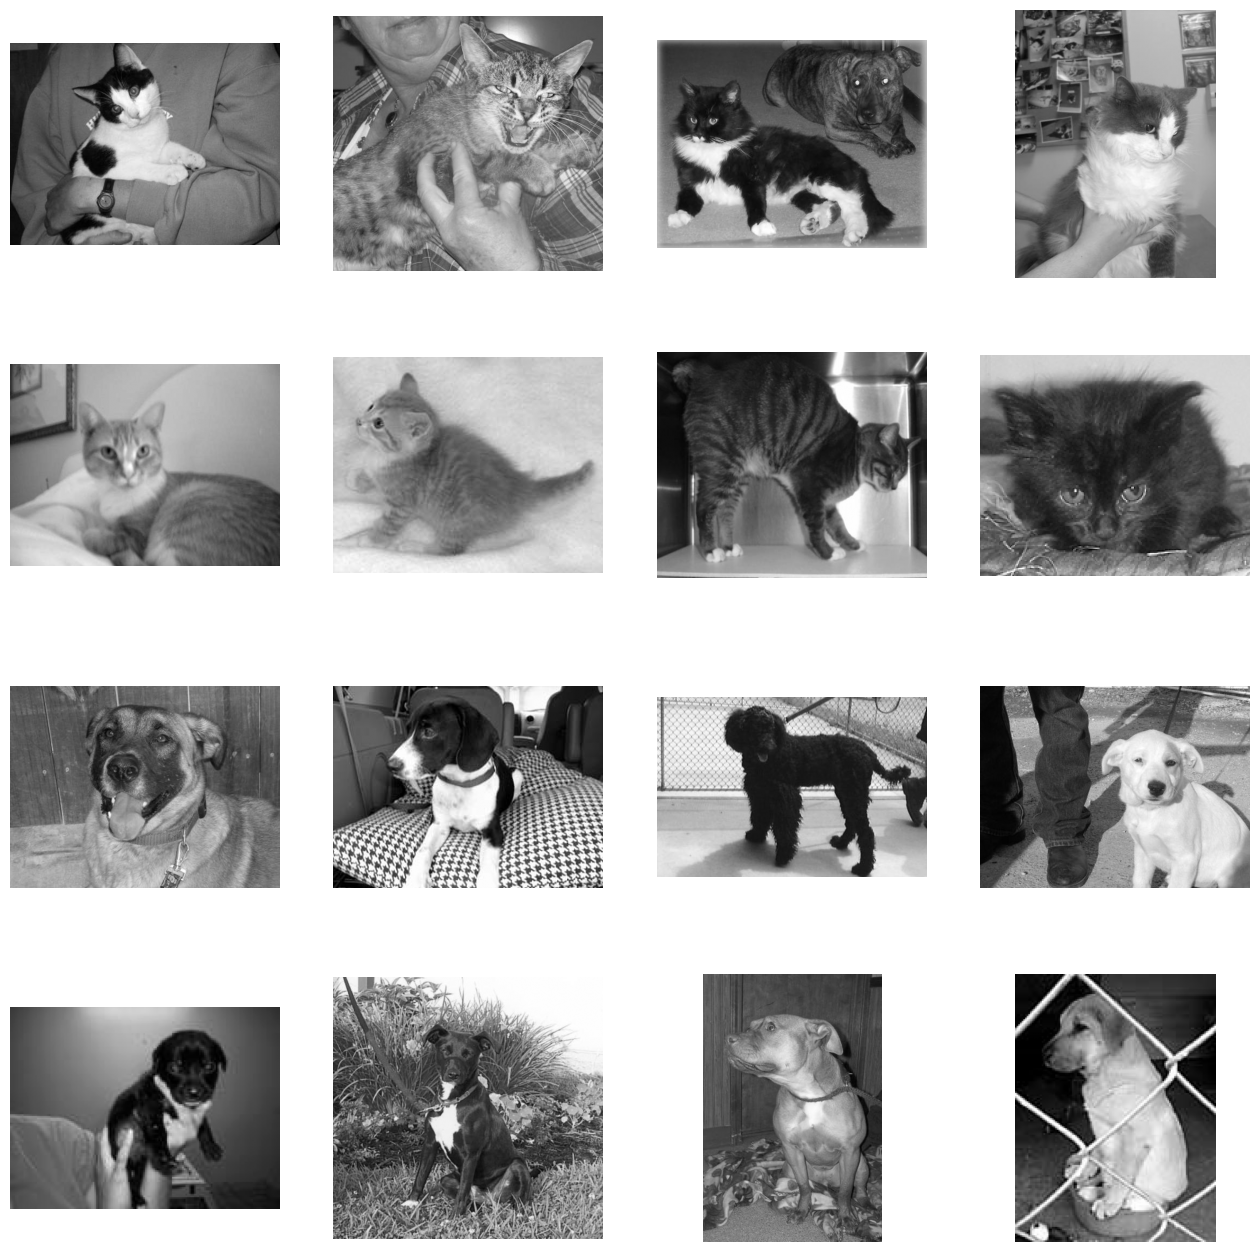

In [18]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# The code you provided
fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('PetImages/Cat')
dog_dir = os.path.join('PetImages/Dog')
cat_filenames = os.listdir(cat_dir)
dog_filenames = os.listdir(dog_dir)

# Initialize lists to store grayscale images
grayscale_cat_images = []
grayscale_dog_images = []

# Loop to process cat images
for cat_file in cat_filenames:
    try:
        # Construct the full image path
        image_path = os.path.join(cat_dir, cat_file)

        # Read the image in color mode (default)
        img = cv2.imread(image_path)

        # Convert the image to grayscale
        # If the image read operation failed (img is None), skip
        if img is not None:
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            grayscale_cat_images.append(gray_img)
            cv2.imwrite(image_path, gray_img)

    except:
        continue

# Loop to process dog images
for dog_file in dog_filenames:
    try:
        # Construct the full image path
        image_path = os.path.join(dog_dir, dog_file)

        # Read the image in color mode (default)
        img = cv2.imread(image_path)

        # Convert the image to grayscale
        # If the image read operation failed (img is None), skip
        if img is not None:
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            grayscale_dog_images.append(gray_img)
            cv2.imwrite(image_path, gray_img)

    except:
        pass


# Rest of the code for displaying images
pic_index = 210

# Adjusting to display the newly created grayscale images
# The slicing is applied to the grayscale lists
cat_images_to_display = grayscale_cat_images[pic_index-8:pic_index]
dog_images_to_display = grayscale_dog_images[pic_index-8:pic_index]

for i, img in enumerate(cat_images_to_display + dog_images_to_display):
    sp = plt.subplot(4, 4, i + 1)
    sp.axis('Off')
    # Use plt.imshow with 'gray' cmap for single-channel images
    plt.imshow(img, cmap='gray')

plt.show()

In [19]:
base_dir = 'PetImages'


train_data = image_dataset_from_directory(base_dir, image_size = (200,200),
                                          subset='training',
                                          shuffle = True,
                                          seed = 1,
                                          validation_split = 0.5,
                                          batch_size = 32
                                          )

test_data = image_dataset_from_directory(base_dir,
                                      image_size=(200,200),
                                      subset='validation',
                                      seed = 1,
                                     validation_split=0.1,
                                      batch_size= 32)

Found 24970 files belonging to 2 classes.
Using 12485 files for training.
Found 24970 files belonging to 2 classes.
Using 2497 files for validation.


In [23]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid'),
])

In [24]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history = model.fit(train_data, epochs=5, validation_data=test_data)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 228s 569ms/step - accuracy: 0.5696 - loss: 0.7381 - val_accuracy: 0.5791 - val_loss: 0.7833
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 233s 596ms/step - accuracy: 0.6044 - loss: 0.6771 - val_accuracy: 0.6059 - val_loss: 0.6648
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 285s 728ms/step - accuracy: 0.6713 - loss: 0.6096 - val_accuracy: 0.6624 - val_loss: 0.6130
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 253s 647ms/step - accuracy: 0.7431 - loss: 0.5236 - val_accuracy: 0.6272 - val_loss: 0.7747
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 263s 672ms/step - accuracy: 0.6305 - loss: 0.6423 - val_accuracy: 0.5667 - val_loss: 0.6889


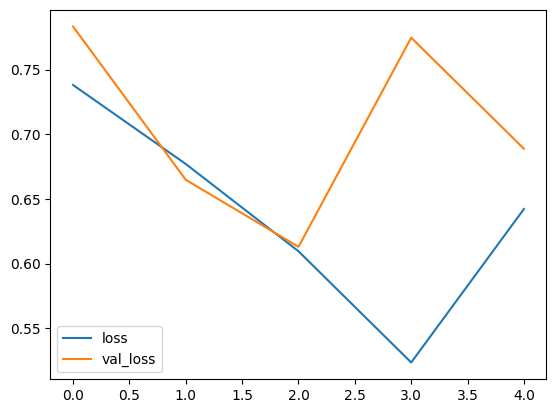

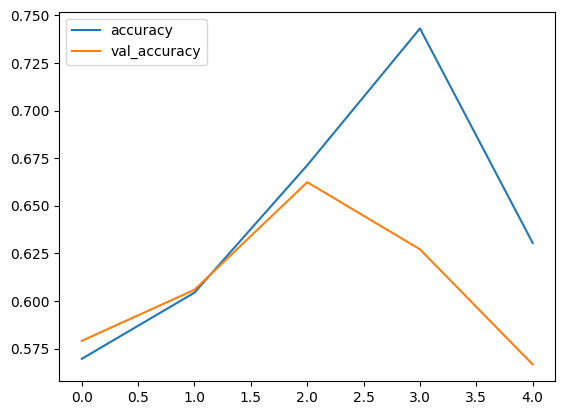

In [39]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()